In [467]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

df = pd.read_csv('stud_math.csv')

In [468]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [469]:
df.shape

(395, 30)

In [470]:
df.dtypes

school                  object
sex                     object
age                      int64
address                 object
famsize                 object
Pstatus                 object
Medu                   float64
Fedu                   float64
Mjob                    object
Fjob                    object
reason                  object
guardian                object
traveltime             float64
studytime              float64
failures               float64
schoolsup               object
famsup                  object
paid                    object
activities              object
nursery                 object
studytime, granular    float64
higher                  object
internet                object
romantic                object
famrel                 float64
freetime               float64
goout                  float64
health                 float64
absences               float64
score                  float64
dtype: object

In [471]:
df.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [472]:
df.fillna(df.median(), inplace= True)

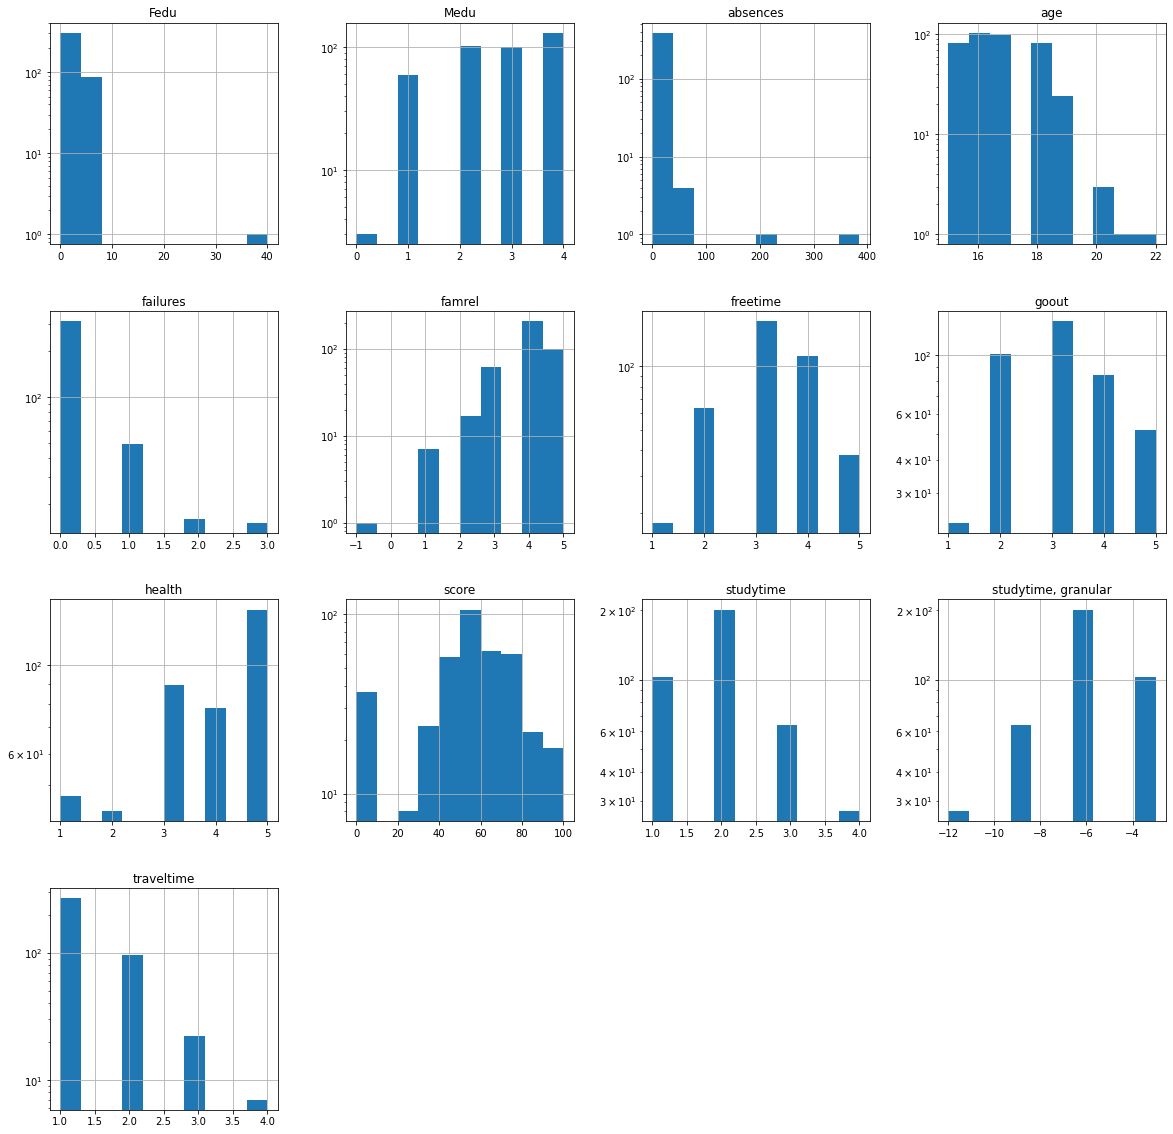

In [473]:
df.hist(figsize= (20,20),log = True);

In [474]:
df.Fedu.replace({40: 4},inplace= True)
df = df[df.absences<200]
df.famrel.replace({-1: 1},inplace= True)



In [475]:
for i, v in df.isnull().sum().items():
    if v != 0:
        
        a = (df[i].value_counts().nlargest(1).index)
        df[i].fillna(list(a)[0], inplace = True)
        

In [476]:
a=[]
for i in df.columns:
    if df[i].dtype=='object':
        print(f'уникальные значения для колонки {i}: {df[i].unique()}')
        a.append(i)
        

уникальные значения для колонки school: ['GP' 'MS']
уникальные значения для колонки sex: ['F' 'M']
уникальные значения для колонки address: ['U' 'R']
уникальные значения для колонки famsize: ['GT3' 'LE3']
уникальные значения для колонки Pstatus: ['A' 'T']
уникальные значения для колонки Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
уникальные значения для колонки Fjob: ['teacher' 'other' 'health' 'services' 'at_home']
уникальные значения для колонки reason: ['course' 'other' 'home' 'reputation']
уникальные значения для колонки guardian: ['mother' 'father' 'other']
уникальные значения для колонки schoolsup: ['yes' 'no']
уникальные значения для колонки famsup: ['no' 'yes']
уникальные значения для колонки paid: ['no' 'yes']
уникальные значения для колонки activities: ['no' 'yes']
уникальные значения для колонки nursery: ['yes' 'no']
уникальные значения для колонки higher: ['yes' 'no']
уникальные значения для колонки internet: ['yes' 'no']
уникальные значения для колонки romantic

In [477]:
df.loc[df.famsize == 'GT3', 'famsize'] = 0
df.loc[df.famsize == 'LE3', 'famsize'] = 1
df.famsize=df.famsize.astype(int)



df.loc[df.school == 'GP', 'school'] = 0
df.loc[df.school == 'MS', 'school'] = 1
df.school=df.school.astype(int)

df.loc[df.sex == 'F', 'sex'] = 0
df.loc[df.sex == 'M', 'sex'] = 1
df.sex=df.sex.astype(int)


df.loc[df.address == 'U', 'address'] = 0
df.loc[df.address == 'R', 'address'] = 1
df.address=df.address.astype(int)


df.loc[df.famsup == 'no', 'famsup'] = 0
df.loc[df.famsup == 'yes', 'famsup'] = 1
df.famsup=df.famsup.astype(int)


df.loc[df.paid == 'no', 'paid'] = 0
df.loc[df.paid == 'yes', 'paid'] = 1
df.paid=df.paid.astype(int)


df.loc[df.activities == 'no', 'activities'] = 0
df.loc[df.activities == 'yes', 'activities'] = 1
df.activities=df.activities.astype(int)


df.loc[df.nursery == 'no', 'nursery'] = 0
df.loc[df.nursery == 'yes', 'nursery'] = 1
df.nursery=df.nursery.astype(int)


df.loc[df.higher == 'no', 'higher'] = 0
df.loc[df.higher == 'yes', 'higher'] = 1
df.higher=df.higher.astype(int)


df.loc[df.internet == 'no', 'internet'] = 0
df.loc[df.internet == 'yes', 'internet'] = 1
df.internet=df.internet.astype(int)


df.loc[df.romantic == 'no', 'romantic'] = 0
df.loc[df.romantic == 'yes', 'romantic'] = 1
df.romantic=df.romantic.astype(int)


df.loc[df.schoolsup == 'no', 'schoolsup'] = 0
df.loc[df.schoolsup == 'yes', 'schoolsup'] = 1
df.schoolsup=df.schoolsup.astype(int)

df.loc[df.Mjob == 'health', 'Mjob'] = 1
df.loc[df.Mjob.isin(['other','services','at_home','teacher']),'Mjob'] = 0
df.Mjob=df.Mjob.astype(int)

df.loc[df.Fjob == 'teacher', 'Fjob'] = 1
df.loc[df.Fjob.isin(['at_home','health','other','services']),'Fjob'] = 0
df.Fjob=df.Fjob.astype(int) 










In [478]:
pos5 = df.corrwith(df.score).nlargest(6).index
neg5 = df.corrwith(df.score).nsmallest(5).index
useful = list(pos5)+list(neg5)

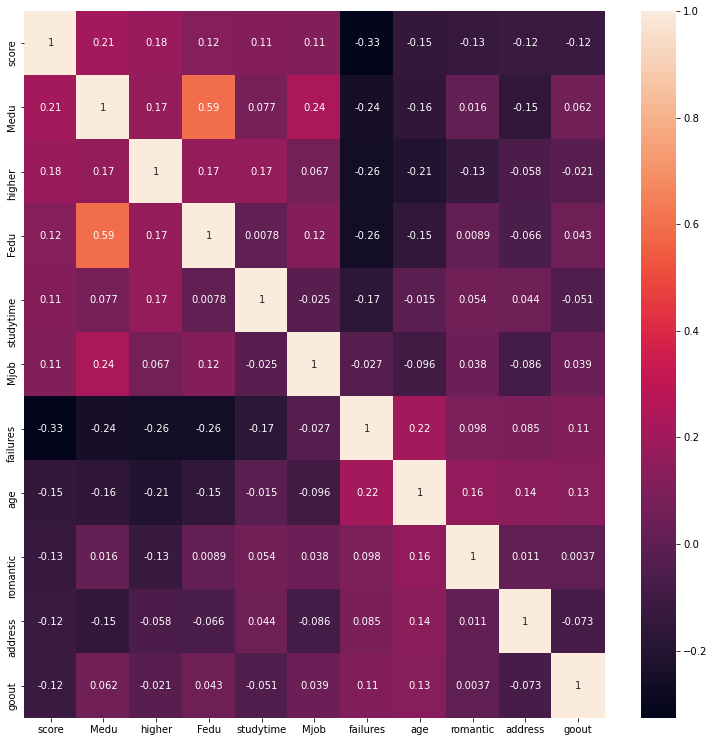

In [479]:
matrix = df[useful].corr()
plt.subplots(figsize=(13,13))
sns.heatmap(matrix, annot=True)

In [480]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,0,0,18,0,0,A,4.0,4.0,0,1,course,mother,2.0,2.0,0.0,1,0,0,0,1,-6.0,1,1,0,4.0,3.0,4.0,3.0,6.0,30.0
1,0,0,17,0,0,T,1.0,1.0,0,0,course,father,1.0,2.0,0.0,0,1,0,0,0,-6.0,1,1,0,5.0,3.0,3.0,3.0,4.0,30.0
2,0,0,15,0,1,T,1.0,1.0,0,0,other,mother,1.0,2.0,3.0,1,0,0,0,1,-6.0,1,1,0,4.0,3.0,2.0,3.0,10.0,50.0
3,0,0,15,0,0,T,4.0,2.0,1,0,home,mother,1.0,3.0,0.0,0,1,1,1,1,-9.0,1,1,1,3.0,2.0,2.0,5.0,2.0,75.0
4,0,0,16,0,0,T,3.0,3.0,0,0,home,father,1.0,2.0,0.0,0,1,1,0,1,-6.0,1,0,0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,1,0,18,0,0,T,1.0,1.0,0,0,course,mother,1.0,2.0,1.0,0,0,0,1,1,-6.0,1,1,0,1.0,1.0,1.0,5.0,0.0,0.0
391,1,1,17,0,1,T,3.0,1.0,0,0,course,mother,2.0,1.0,0.0,0,0,0,0,0,-3.0,1,1,0,2.0,4.0,5.0,2.0,3.0,80.0
392,1,1,21,1,0,T,1.0,1.0,0,0,course,mother,1.0,1.0,3.0,0,0,0,0,0,-3.0,1,0,0,5.0,5.0,3.0,3.0,3.0,35.0
393,1,1,18,1,1,T,3.0,2.0,0,0,course,mother,3.0,1.0,0.0,0,0,0,1,0,-3.0,1,1,0,4.0,4.0,1.0,5.0,0.0,50.0


In [481]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

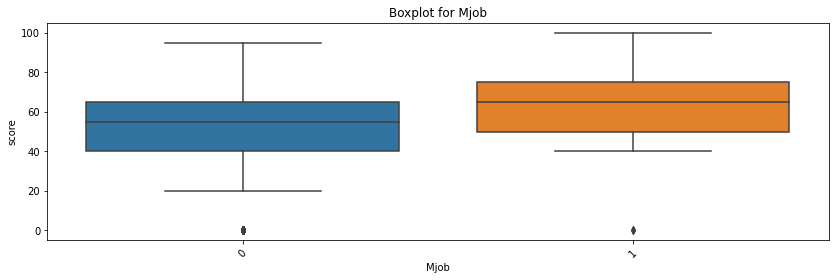

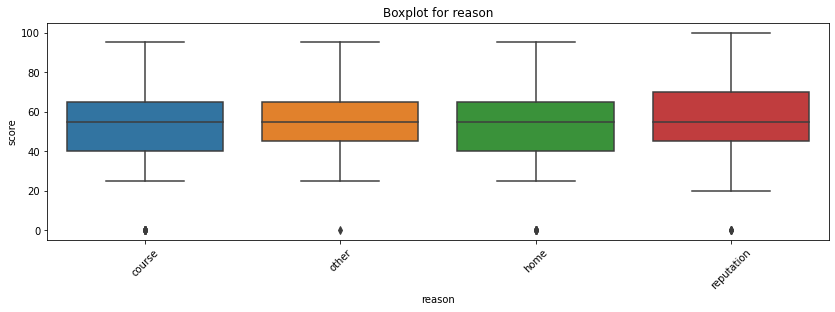

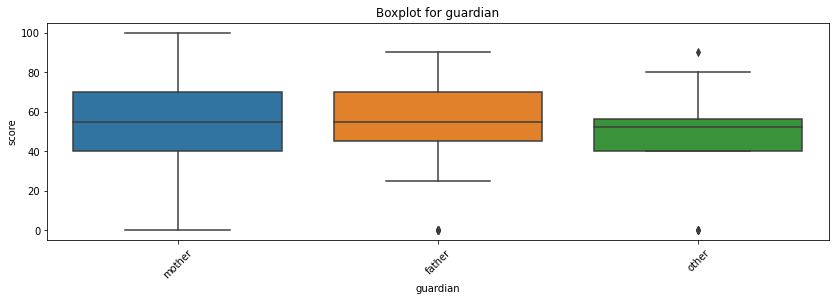

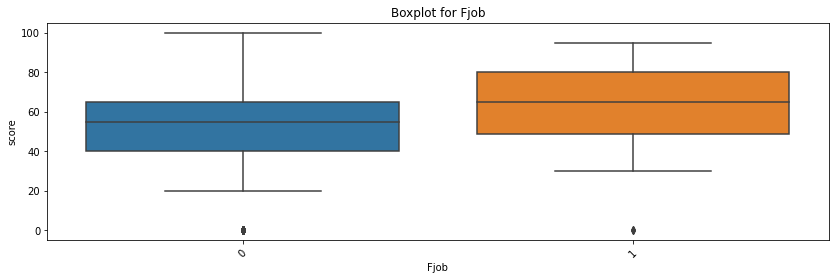

In [482]:
for col in ['Mjob', 'reason', 'guardian', 'Fjob']:
    get_boxplot(col)


In [1]:
conda install -c conda-forge jupyter_contrib_nbextensions

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Applications/anaconda3

  added / updated specs:
    - jupyter_contrib_nbextensions


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38h50d1736_0         3.1 MB  conda-forge
    jupyter_contrib_core-0.3.3 |             py_2          15 KB  conda-forge
    jupyter_contrib_nbextensions-0.5.1|   py38h32f6830_1        19.4 MB  conda-forge
    jupyter_highlight_selected_word-0.2.0|py38h32f6830_1002          14 KB  conda-forge
    jupyter_latex_envs-1.4.6   |py38h32f6830_1001         668 KB  conda-forge
    jupyter_nbextensions_configurator-0.4.1|   py38h32f6830_2         471 KB  conda-forge
    python_abi-3.8  

| b'[I 12:05:19 InstallContribNbextensionsApp] jupyter contrib nbextension install --sys-prefix\n[I 12:05:19 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory\n[I 12:05:19 InstallContribNbextensionsApp] Installing /Applications/anaconda3/lib/python3.8/site-packages/jupyter_contrib_nbextensions/nbextensions/rubberband -> rubberband\n[I 12:05:19 InstallContribNbextensionsApp] Making directory: /Applications/anaconda3/share/jupyter/nbextensions/rubberband/\n[I 12:05:19 InstallContribNbextensionsApp] Copying: /Applications/anaconda3/lib/python3.8/site-packages/jupyter_contrib_nbextensions/nbextensions/rubberband/icon.png -> /Applications/anaconda3/share/jupyter/nbextensions/rubberband/icon.png\n[I 12:05:19 InstallContribNbextensionsApp] Copying: /Applications/anaconda3/lib/python3.8/site-packages/jupyter_contrib_nbextensions/nbextensions/rubberband/main.css -> /Applications/anaconda3/share/jupyter/nbextensions/rubberband/main

done

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install autopep8

Note: you may need to restart the kernel to use updated packages.
